In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline 

#Importing all the required model for model comparision
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

#Importing library for splitting model into train and test and for data transformation
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
path = 'C:/Users/ASUS/OneDrive/Desktop/Blood Donation/Dataset/blood-train.csv'
path1 = 'C:/Users/ASUS/OneDrive/Desktop/Blood Donation/Dataset/blood-test.csv'
blood = path + 'blood-train.csv'
blood1 = path1 + 'blood-test.csv'


In [5]:
train = pd.read_csv(path)
test = pd.read_csv(path1)

In [6]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [7]:
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)

Train Shape :  (576, 6)
Test Shape :  (200, 5)


In [8]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [9]:
train["Made Donation in March 2007"].value_counts()

Made Donation in March 2007
0    438
1    138
Name: count, dtype: int64

In [10]:
#Storing dependent variable in Y
Y=train.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [11]:
train.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [12]:
old_train=train
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]

In [13]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [14]:
df=pd.merge(train,test)

In [15]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [16]:
X=df.iloc[:,:]
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [17]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


<Axes: ylabel='Months since Last Donation'>

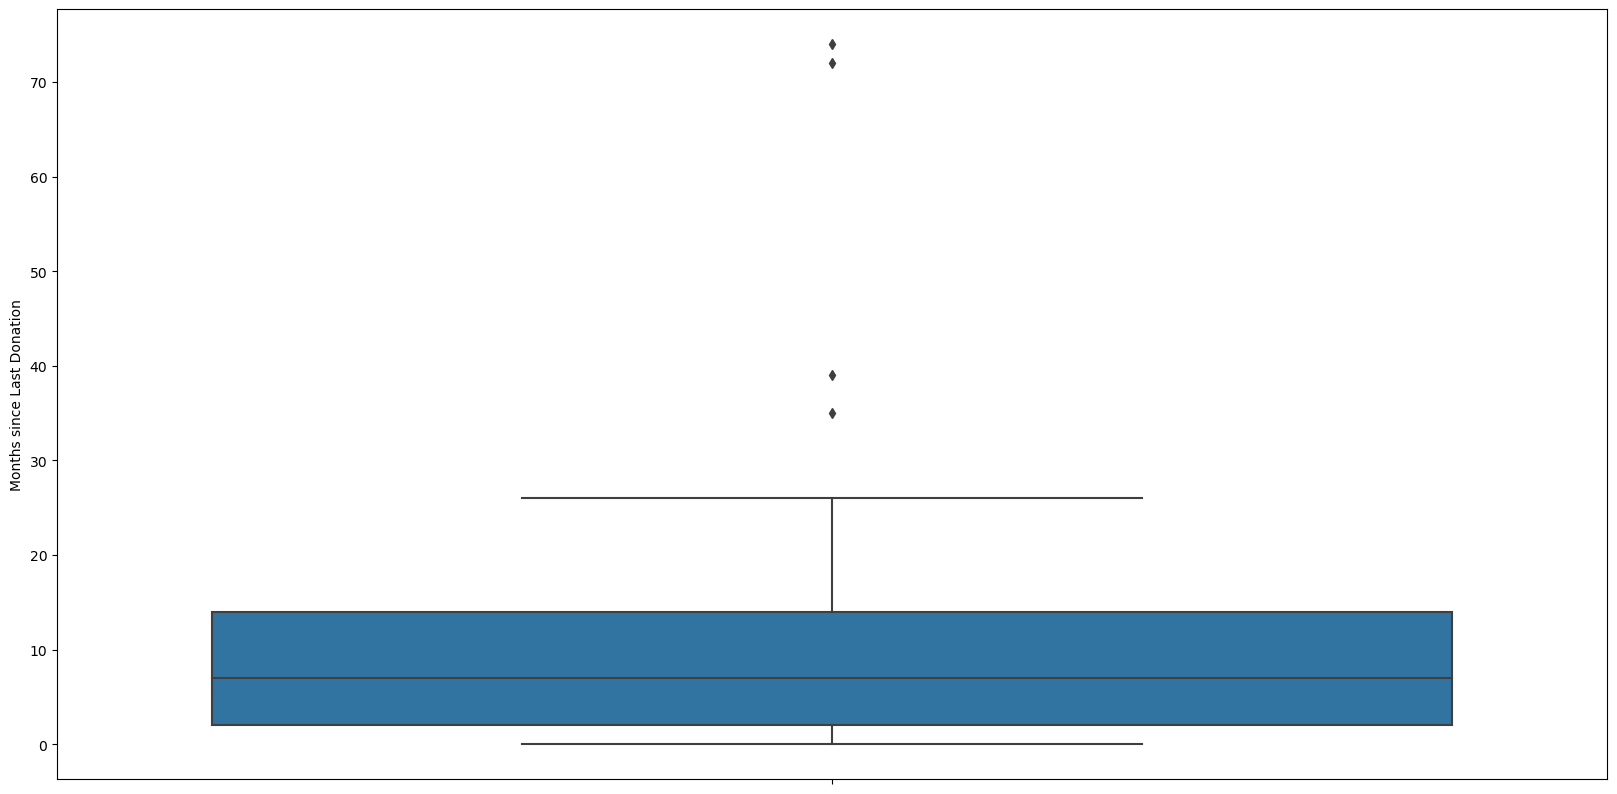

In [18]:
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Months since Last Donation",data=old_train)

<Axes: >

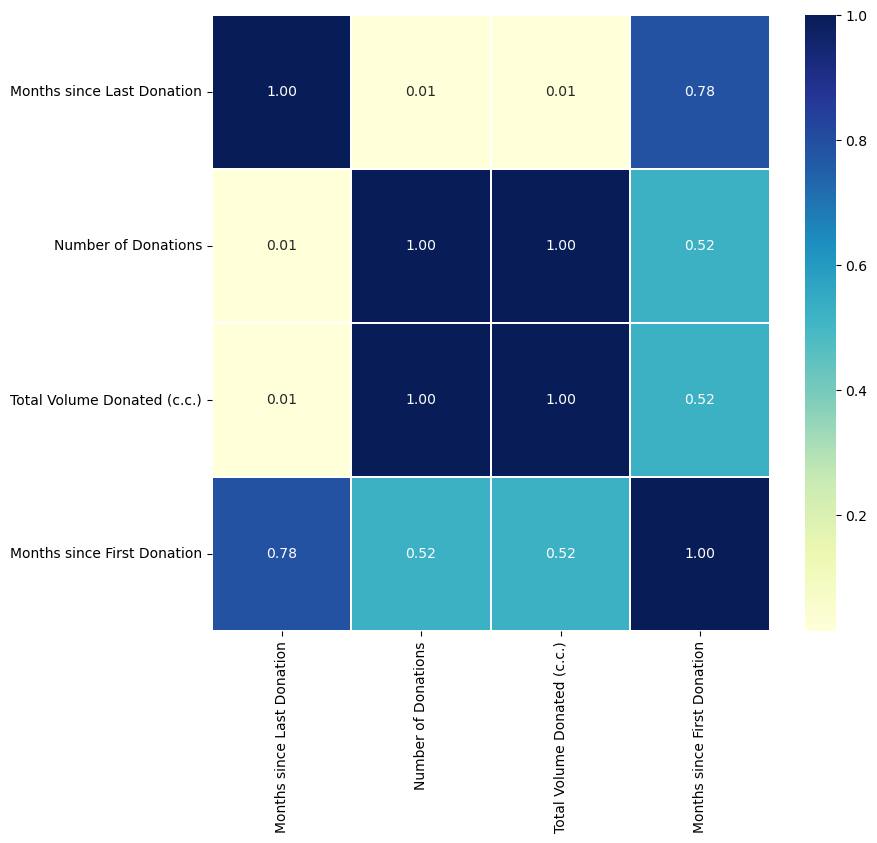

In [19]:
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True)

In [20]:
train["Months since Last Donation"].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

In [21]:
X["Donating for"] = (X["Months since First Donation"] - X["Months since Last Donation"])

In [22]:
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


<Axes: >

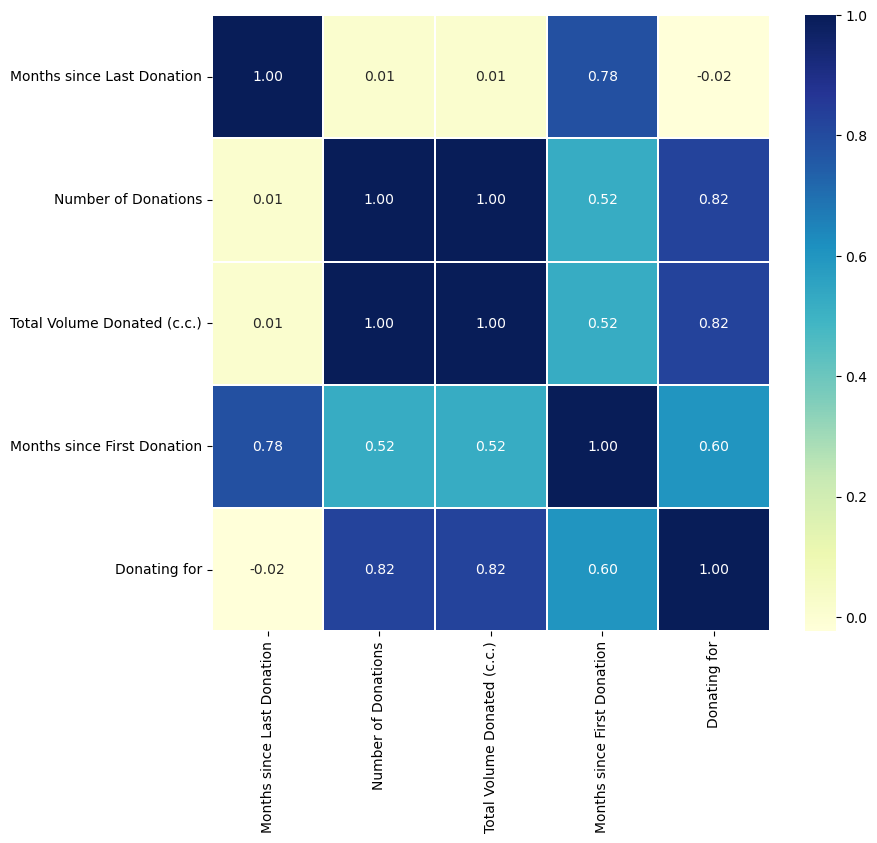

In [23]:
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True)

In [24]:
X.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [25]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [26]:
X.shape

(810, 4)

In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#Fitting and transforming data
X=scale.fit_transform(X)

In [28]:
train=X[:576]

In [29]:
train.shape

(576, 4)

In [30]:
test=X[576:]

In [31]:
Y=Y[:576]

In [32]:
Y.shape

(576,)

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)

In [34]:
logreg = LogisticRegression(random_state=7)
#Fitting the model
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=7)

In [35]:
pred=logreg.predict(xtest)

In [36]:
accuracy_score(pred,ytest)

0.7155172413793104

In [37]:
roc_auc_score(pred,ytest)

0.7321428571428571

In [38]:
### SVC classifier
SVMC = SVC(probability=True)
#Fitting the model
SVMC.fit(train,Y)

SVC(probability=True)

In [39]:
#Predicting on the test data
pred=SVMC.predict(xtest)

In [40]:
accuracy_score(pred, ytest)

0.7844827586206896

In [41]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [42]:
#Printing the roc auc score
roc_auc_score(pred,ytest)

0.8429487179487177

In [43]:
#Building the model
RFC = RandomForestClassifier()
#Fitting the model
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [44]:
#Predicting the test data result
pred=RFC.predict(xtest)

In [45]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[79, 24],
       [ 2, 11]], dtype=int64)

In [46]:
accuracy_score(pred, ytest)

0.7758620689655172

In [47]:
#Printingthe roc auc score
roc_auc_score(pred,ytest)

0.806572068707991

In [48]:
#Building the model
model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)

In [49]:
#Fitting the model
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=15, max_features=3, max_leaf_nodes=4)

In [50]:
#Predicting the test data
pred=model.predict(xtest)

In [51]:
accuracy_score(pred, ytest)

0.7672413793103449

In [52]:
#printing the confusion matrix
confusion_matrix(pred,ytest)

array([[79, 25],
       [ 2, 10]], dtype=int64)

In [53]:
#Printing accuracy score
accuracy_score(pred,ytest)

0.7672413793103449

In [54]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.796474358974359

In [55]:
#Building the Model
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,),random_state=1)
clf_neural.fit(train, Y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [56]:
#Predicting from the fitted model on test data
print('Predicting...\nIn Test Data')
predicted = clf_neural.predict(xtest)

Predicting...
In Test Data


In [57]:
#printing confusion matrix
confusion_matrix(predicted,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [58]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.796474358974359

In [59]:
accuracy_score(pred, ytest)

0.7672413793103449

In [60]:
import pickle
pickle.dump(SVMC,open('C:/Users/ASUS/OneDrive/Desktop/Blood Donation/model.pkl','wb'))

In [61]:
model = pickle.load(open('C:/Users/ASUS/OneDrive/Desktop/Blood Donation/model.pkl', 'rb'))

In [62]:
prediction=SVMC.predict((np.array([[24,3,525,28]])))
print("The chance of  donation by a donor for given factors is:",prediction)

The chance of  donation by a donor for given factors is: [0]
